In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.models import Sequential
import glob
import cv2
from pathlib import Path
import pathlib
import PIL
import os
from PIL import Image
from sklearn.preprocessing import OneHotEncoder
from keras import Sequential
from keras.layers import InputLayer, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Dense, Flatten
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file = r'/content/drive/MyDrive/DeepLearningFall23/Project/coins_count_values.csv'
df_coins = pd.read_csv(file)
print(df_coins)

         folder      image_name  coins_count
0     all_coins  01207e3d7e.jpg            5
1     all_coins  0140acf6eb.jpg            4
2     all_coins  025c8579f0.jpg            2
3     all_coins  028ca794e7.jpg            4
4     all_coins  02e080206f.jpg           40
...         ...             ...          ...
1439  yen_coins  f8934b8498.jpg            6
1440  yen_coins  fb5981d5de.jpg            2
1441  yen_coins  fb6f6573b6.jpg            2
1442  yen_coins  fe3d6dfd45.jpg            1
1443  yen_coins  ffa5e02e21.jpg            2

[1444 rows x 3 columns]


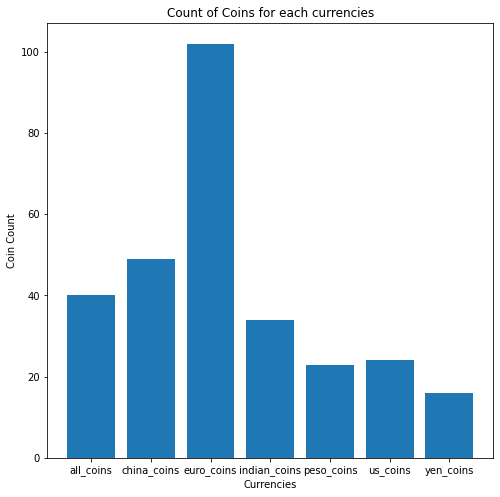

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8,8))
plt.bar(df_coins['folder'], df_coins['coins_count'])
plt.title('Count of Coins for each currencies')
plt.xlabel('Currencies')
plt.ylabel('Coin Count')
plt.show()

In [ ]:
class_names = np.sort(df_coins.coins_count.unique())
class_names

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  23,  24,  26,  27,  28,
        29,  30,  32,  34,  35,  36,  39,  40,  49,  96, 102])

In [ ]:
df_coins.coins_count.unique().size

37

In [ ]:
df_coins.image_name.unique().size

1428

In [ ]:
def fromJPEGtoNumPyArray(path):
    image = Image.open(path)
    image = image.resize((128, 128))
    image_array = np.array(image).astype(float)
    image_array /= 255
    image.close()
    return image_array

In [ ]:
coins = []
coins_y = []
paths = ['/content/drive/MyDrive/DeepLearningFall23/Project/coin_images/all_coins/',
         '/content/drive/MyDrive/DeepLearningFall23/Project/coin_images/china_coins/',
         '/content/drive/MyDrive/DeepLearningFall23/Project/coin_images/euro_coins/',
         '/content/drive/MyDrive/DeepLearningFall23/Project/coin_images/indian_coins/',
         '/content/drive/MyDrive/DeepLearningFall23/Project/coin_images/peso_coins/',
         '/content/drive/MyDrive/DeepLearningFall23/Project/coin_images/us_coins/',
         '/content/drive/MyDrive/DeepLearningFall23/Project/coin_images/yen_coins/']

for path in paths:
    for file in os.listdir(path):
        coins.append(fromJPEGtoNumPyArray(path + file))
        coins_y.append(*df_coins['coins_count'].loc[df_coins['image_name'] == file].drop_duplicates().tolist())

In [ ]:
X = np.array(coins)
X.shape

(1444, 128, 128, 3)

In [ ]:
y = OneHotEncoder(sparse = False).fit_transform(np.array(coins_y).reshape((-1, 1)))
y.shape

(1444, 37)

Splitting the data into Test and Train (80/20)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

**Model 1: Base Model**

In [ ]:
#Building the Model
model_1 = Sequential()
model_1.add(InputLayer(input_shape = (128, 128, 3), sparse=False))

model_1.add(Conv2D(16, kernel_size = (3, 3), activation = 'ReLU'))
model_1.add(MaxPooling2D((2,2)))
model_1.add(Dropout(0.1))    
model_1.add(Conv2D(32, kernel_size = (3, 3), activation = 'ReLU'))
model_1.add(MaxPooling2D((2,2)))
model_1.add(Dropout(0.1))
model_1.add(Conv2D(64, kernel_size = (3, 3), activation = 'ReLU'))
model_1.add(MaxPooling2D())
model_1.add(Dropout(0.1))

model_1.add(Flatten())
model_1.add(Dense(500, activation = 'ReLU'))

model_1.add(Dense(y.shape[1], activation = 'softmax'))

model_1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
#Model Summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 32)        0

In [ ]:
#Model Fit
history = model_1.fit(X_train, y_train, epochs = 20, batch_size = 40, validation_data=(X_test, y_test), verbose = 1)

Epoch 1/20
29/29 [==============================] - 22s 723ms/step - loss: 2.9716 - accuracy: 0.2511 - val_loss: 2.5167 - val_accuracy: 0.2941
Epoch 2/20
29/29 [==============================] - 20s 696ms/step - loss: 2.3860 - accuracy: 0.3316 - val_loss: 2.5625 - val_accuracy: 0.3322
Epoch 3/20
29/29 [==============================] - 21s 726ms/step - loss: 2.2834 - accuracy: 0.3558 - val_loss: 2.3455 - val_accuracy: 0.3391
Epoch 4/20
29/29 [==============================] - 21s 740ms/step - loss: 1.8700 - accuracy: 0.5030 - val_loss: 1.9022 - val_accuracy: 0.4948
Epoch 5/20
29/29 [==============================] - 21s 708ms/step - loss: 1.4048 - accuracy: 0.6069 - val_loss: 1.5926 - val_accuracy: 0.5709
Epoch 6/20
29/29 [==============================] - 21s 709ms/step - loss: 0.9934 - accuracy: 0.7195 - val_loss: 1.3298 - val_accuracy: 0.6817
Epoch 7/20
29/29 [==============================] - 20s 706ms/step - loss: 0.6864 - accuracy: 0.8130 - val_loss: 1.1938 - val_accuracy: 0.7197

**Model Evaluation**

In [ ]:
model_1.evaluate(X_test, y_test)

10/10 [==============================] - 1s 139ms/step - loss: 1.2297 - accuracy: 0.8408


[1.2296757698059082, 0.8408304452896118]

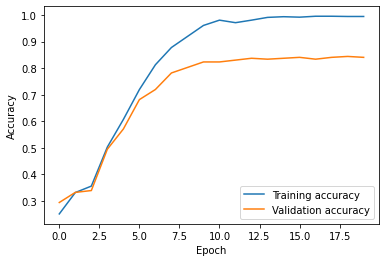

In [ ]:
#Plot Training Accuracy Vs Test Accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

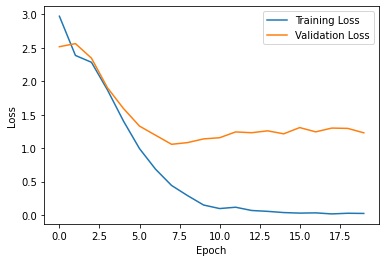

In [ ]:
#Plot Training Loss Vs Test Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

**Model Prediction**

In [ ]:
def tryImagesForModel1(path):
  coin = []
  coin.append(fromJPEGtoNumPyArray(path))
    
  return np.array(coin)

In [ ]:
paths = '/content/drive/MyDrive/DeepLearningFall23/Project/GoogleImages/euro coins.jpg'
trial = tryImagesForModel1(paths)
img_prediction = model_1.predict(trial)
score = tf.nn.softmax(img_prediction[0])
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 113ms/step
This image most likely belongs to 8 with a 6.99 percent confidence.


**Model 2**

In [ ]:
#Data Augumentation: Using Image Rotation
def rotateImage(path, rotate):
    image = Image.open(path)
    image = image.resize((128, 128))
    image = image.rotate(rotate)
    image_array = np.array(image).astype(float) / 255
    image.close()
    return image_array 

In [ ]:
coins_y = []
coins = []
paths = ['../content/drive/MyDrive/DeepLearningFall23/Project/coin_images/all_coins/',
        '../content/drive/MyDrive/DeepLearningFall23/Project/coin_images/china_coins/',
        '../content/drive/MyDrive/DeepLearningFall23/Project/coin_images/euro_coins/',
        '../content/drive/MyDrive/DeepLearningFall23/Project/coin_images/indian_coins/',
        '../content/drive/MyDrive/DeepLearningFall23/Project/coin_images/peso_coins/',
        '../content/drive/MyDrive/DeepLearningFall23/Project/coin_images/us_coins/',
        '../content/drive/MyDrive/DeepLearningFall23/Project/coin_images/yen_coins/']

for path in paths:
    for degree in range(0, 360, 90):
        for file in os.listdir(path):
            coins.append(rotateImage(path + file, degree))
            coins_y.append(*df_coins['coins_count']
                           .loc[df_coins['image_name'] == file]
                           .drop_duplicates()
                           .tolist())   
             
X = np.array(coins)
X.shape        

(5776, 128, 128, 3)

In [ ]:
y = OneHotEncoder(sparse = False).fit_transform(np.array(coins_y).reshape((-1, 1)))
y.shape

(5776, 37)

In [ ]:
#Model2: Splitting into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [ ]:
#Model2: Building
model_2 = Sequential()
model_2.add(InputLayer((128, 128, 3)))

model_2.add(Conv2D(16, kernel_size = (3, 3), activation = 'ReLU'))
model_2.add(MaxPooling2D((2, 2)))
model_2.add(Dropout(0.5))
model_2.add(Conv2D(32, kernel_size = (3, 3), activation = 'ReLU'))
model_2.add(MaxPooling2D((2, 2)))
model_2.add(Dropout(0.5))
model_2.add(Conv2D(64, kernel_size = (3, 3), activation = 'ReLU'))
model_2.add(MaxPooling2D((2, 2)))
model_2.add(Dropout(0.5))
model_2.add(Conv2D(128, kernel_size = (3, 3), activation = 'ReLU'))
model_2.add(MaxPooling2D((2, 2)))
model_2.add(Dropout(0.5))
model_2.add(Flatten())
model_2.add(Dense(1000, activation = 'ReLU'))
model_2.add(Dense(y.shape[1], activation = 'softmax'))

model_2.compile(optimizer = 'adam', metrics = ['accuracy'], loss = 'categorical_crossentropy')

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 16)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 63, 63, 16)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 30, 30, 32)       

In [ ]:
model_2.fit(X_train, y_train, epochs = 30, batch_size = 50, validation_data=(X_test, y_test), verbose = 1)

Epoch 1/30
93/93 [==============================] - 89s 952ms/step - loss: 2.6632 - accuracy: 0.2509 - val_loss: 2.7672 - val_accuracy: 0.3365
Epoch 2/30
93/93 [==============================] - 92s 988ms/step - loss: 2.3578 - accuracy: 0.2981 - val_loss: 2.4873 - val_accuracy: 0.3365
Epoch 3/30
93/93 [==============================] - 86s 928ms/step - loss: 2.2996 - accuracy: 0.3050 - val_loss: 2.2593 - val_accuracy: 0.3391
Epoch 4/30
93/93 [==============================] - 87s 933ms/step - loss: 2.1094 - accuracy: 0.3801 - val_loss: 1.8879 - val_accuracy: 0.4611
Epoch 5/30
93/93 [==============================] - 91s 980ms/step - loss: 1.7534 - accuracy: 0.5006 - val_loss: 1.5208 - val_accuracy: 0.5813
Epoch 6/30
93/93 [==============================] - 86s 930ms/step - loss: 1.4979 - accuracy: 0.5690 - val_loss: 1.3772 - val_accuracy: 0.6168
Epoch 7/30
93/93 [==============================] - 89s 959ms/step - loss: 1.2889 - accuracy: 0.6175 - val_loss: 1.2856 - val_accuracy: 0.6306

In [ ]:
model_2.evaluate(X_test, y_test)

37/37 [==============================] - 6s 155ms/step - loss: 1.0057 - accuracy: 0.8227


[1.005708932876587, 0.8226643800735474]

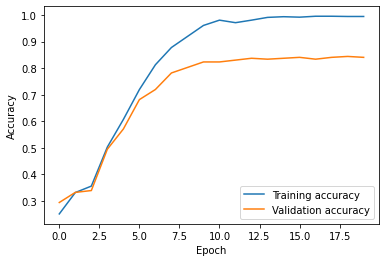

In [ ]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

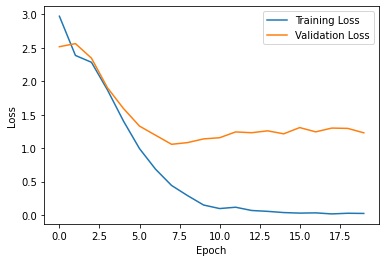

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

**Model Prediction**

In [ ]:
def tryImages(path):
  coin = []
  for deg in range(0, 360, 90):
    coin.append(rotateImage(path, degree))
    
  return np.array(coin)

In [ ]:
paths = '/content/drive/MyDrive/DeepLearningFall23/Project/coin_images/all_coins/27ad5d7140.jpg'
trial = tryImages(paths)
img_prediction = model_2.predict(trial)
score = tf.nn.softmax(img_prediction[0])
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 124ms/step
This image most likely belongs to 9 with a 7.02 percent confidence.
